In [320]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [321]:
df = pd.read_csv('vehicle.csv')

In [322]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# EDA 

In [323]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [332]:
df.shape

(846, 19)

####  filling na values with their mean values 

In [333]:
df = df.fillna(df.mean())

In [334]:
df.isna().sum().any()

False

In [335]:
columns= df.columns.tolist()

In [328]:
sns.pairplot(df, hue = 'class')

In [336]:
for i in range(len(columns)-1):
    df.boxplot(column= columns[i] ,by='class')

In [338]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [339]:
dic = {'van':0, 'car':1, 'bus':2}
df['class']= df['class'].map(dic)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

#### handling outliers 

In [341]:
z = np.abs(stats.zscore(df))
print(z)

[[0.16058035 0.51730193 0.05654535 ... 0.31219283 0.18395733 1.45708611]
 [0.32546965 0.62456401 0.12011169 ... 0.01308823 0.45297703 1.45708611]
 [1.25419283 0.84354934 1.51857115 ... 0.1495523  0.04944748 0.03200536]
 ...
 [1.49721783 1.49604417 1.20073946 ... 0.31219283 0.72199673 0.03200536]
 [0.93303214 1.44018254 0.26128634 ... 0.17572877 0.08506238 0.03200536]
 [1.05454464 1.44018254 1.02408241 ... 0.47483337 0.75761164 1.45708611]]


In [343]:
df = df[(z < 3).all(axis=1)]

In [344]:
df.shape

(824, 19)

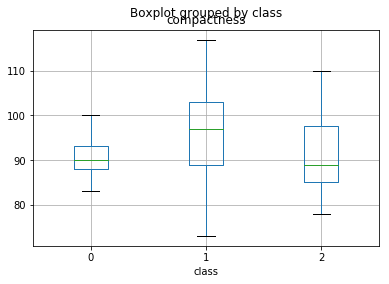

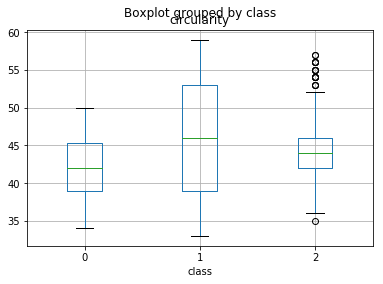

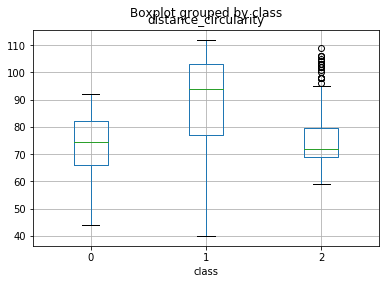

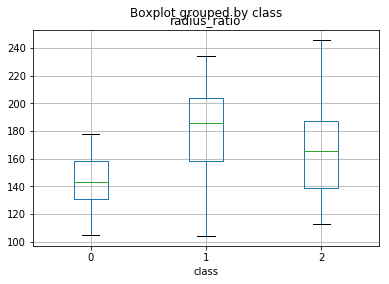

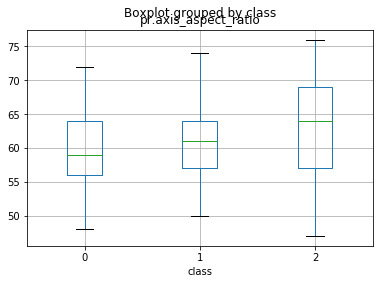

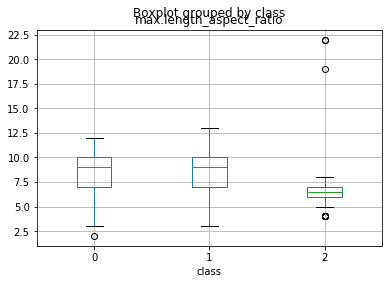

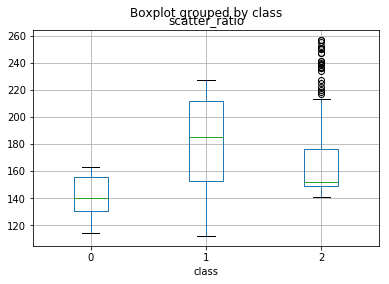

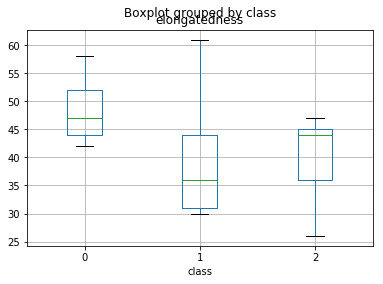

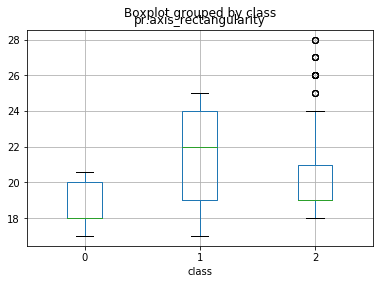

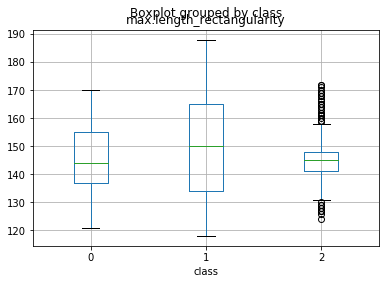

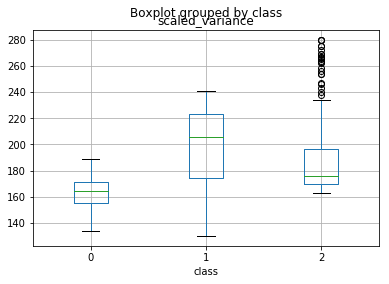

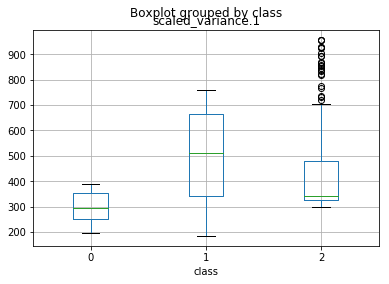

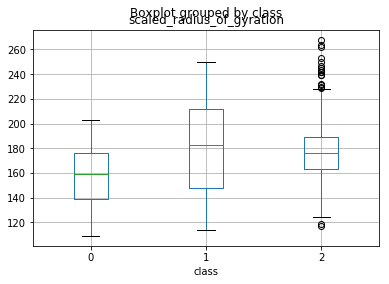

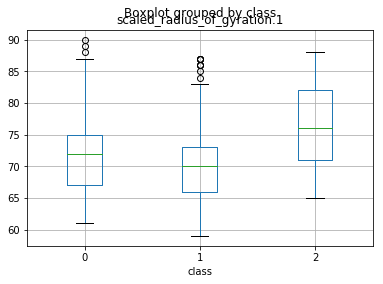

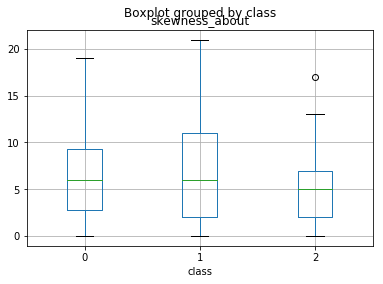

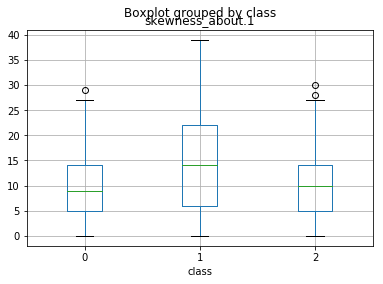

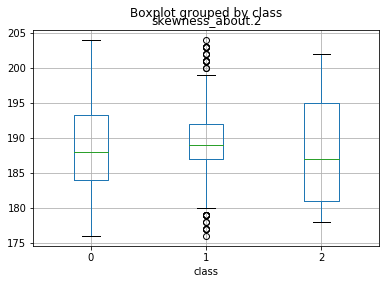

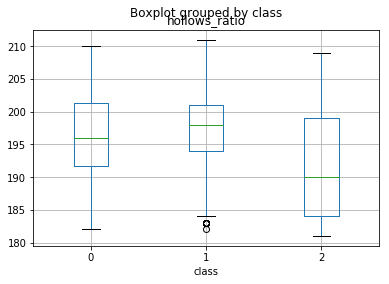

In [346]:
for i in range(len(columns)-1):
    df.boxplot(column= columns[i] ,by='class')

In [347]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.000000,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,0
1,91,41.000000,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,0
2,104,50.000000,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.000000,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,0
5,107,44.828775,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,2


In [351]:
X = df.drop(['class'], axis=1)

In [352]:
y = df['class']

#### scaling train and test dataset. 

In [415]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = .30,random_state = 34)

In [417]:
from sklearn import preprocessing
standardscaler = preprocessing.StandardScaler()

In [418]:
X_scaled_train = standardscaler.fit_transform(X_train.loc[:,])
X_scaled_test = standardscaler.transform(X_test.loc[:,])
y_train = y_train.values
y_test =  y_test.values

C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### PCA to find most important components 

In [419]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [420]:
#print(pca.components_) 
print(pca.explained_variance_)

[3.24320452e+04 5.50824891e+02 3.32223653e+02 8.03426687e+01
 7.02268118e+01 4.01511998e+01 3.65337169e+01 2.37672300e+01
 2.07872695e+01 1.19024765e+01 9.81203669e+00 5.60310768e+00
 2.83529693e+00 2.40842470e+00 1.40525230e+00 1.05306741e+00
 8.10740662e-01 1.10687886e-01]


In [421]:
eig_vals = pca.explained_variance_

In [422]:
total = sum(pca.explained_variance_)
var_exp = [( i /total ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 96.45836462  98.09661061  99.08469971  99.32365233  99.5325187
  99.65193513  99.76059256  99.8312803   99.89310514  99.92850511
  99.95768776  99.97435235  99.982785    99.98994806  99.99412752
  99.99725952  99.9996708  100.        ]


#### frist 3 components explained 99% of variance.. so we will use PCA =3 


In [423]:
from sklearn.decomposition import PCA
pca = PCA(3)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

#### SVM on scaled PCA components. 

In [424]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_pca_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_pca_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))


C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}
Accuracy: 0.5604838709677419
Confusion Matrix:
 [[27 25 18]
 [10 96 39]
 [10  7 16]]


#### Performance is very poor on this scaled PCA training data. 

#### Using SVM on scaled features only 

In [425]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_scaled_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_scaled_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))


Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9637096774193549
Confusion Matrix:
 [[ 45   5   0]
 [  1 121   0]
 [  1   2  73]]


C:\Users\Dhirender.Jit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


#### Performance is much better approx. 96.3% 